In [5]:
from wl_utils import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['power', 'info', 'random', 'fft', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
m256 = run("./build/grigor/")
m1024 = run("./build/grigor_1024/")

No WF Data!
No
T
No
1
No WF Data!
NO!
No
No fisher
No
No window
0
No


(<matplotlib.axes._axes.Axes at 0x7f85782b0290>,
 <matplotlib.image.AxesImage at 0x7f8578104a90>)

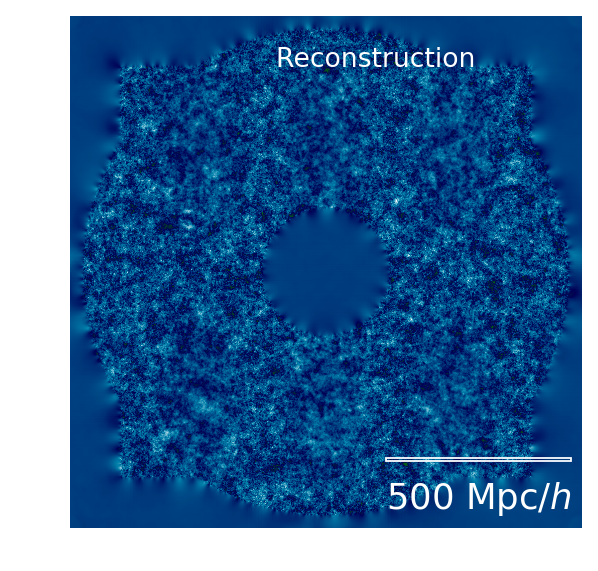

In [33]:
plot_image(m1024.delta_x_min,colorbar=False,text="Reconstruction")

In [ ]:
plot_image(m1024.datax2*m256.mask,text="Observed")
plot_image(m256.delta_x_min,text="Reconstructed")
plot_image(m256.delta_x,text="True")

(<matplotlib.axes._axes.Axes at 0x7f857c494090>,
 <matplotlib.image.AxesImage at 0x7f857b832ed0>)

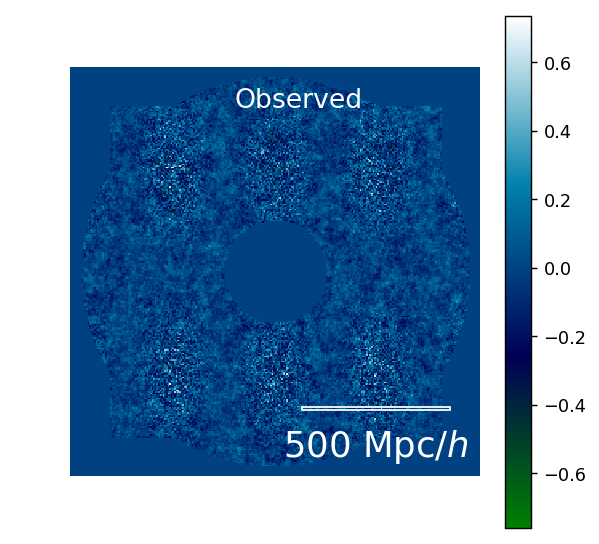

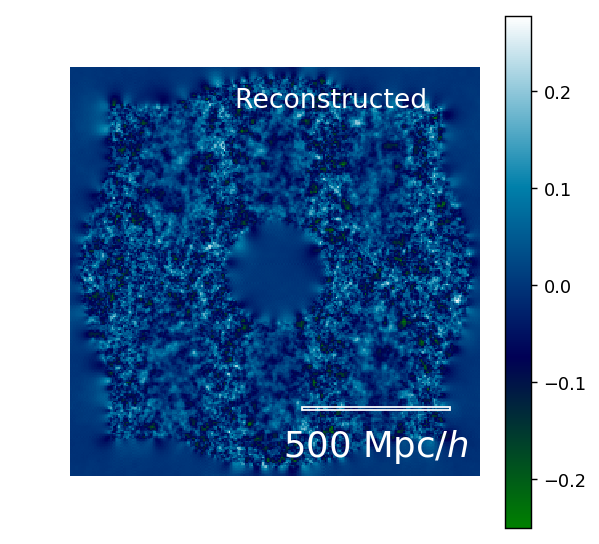

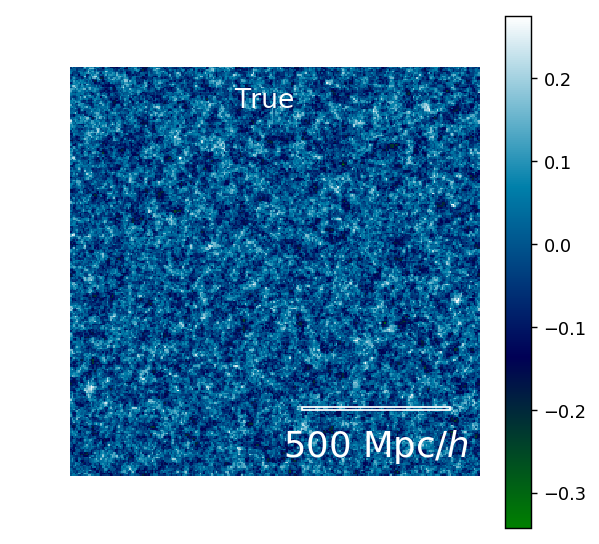

In [16]:
plot_image(m256.datax2*m256.mask,text="Observed")
plot_image(m256.delta_x_min,text="Reconstructed")
plot_image(m256.delta_x,text="True")

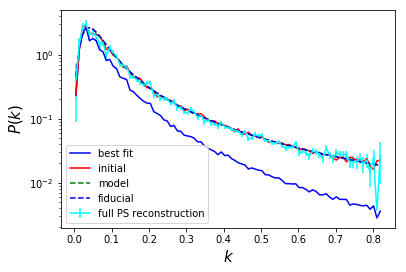

In [17]:
P_k(m256)

(<matplotlib.axes._axes.Axes at 0x7f857c95a490>,
 <matplotlib.image.AxesImage at 0x7f857c6a5cd0>)

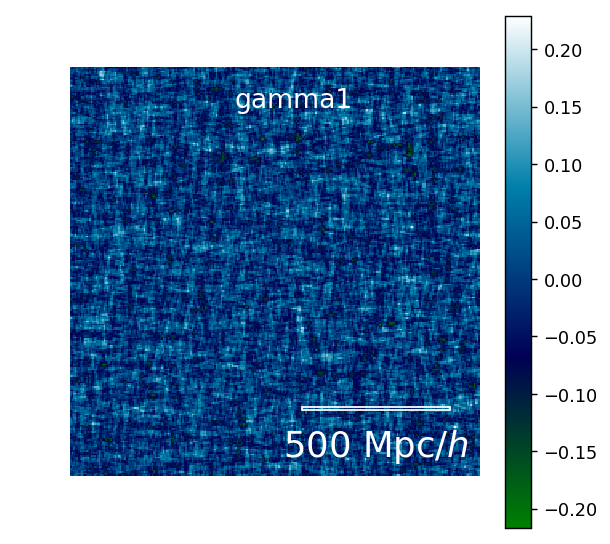

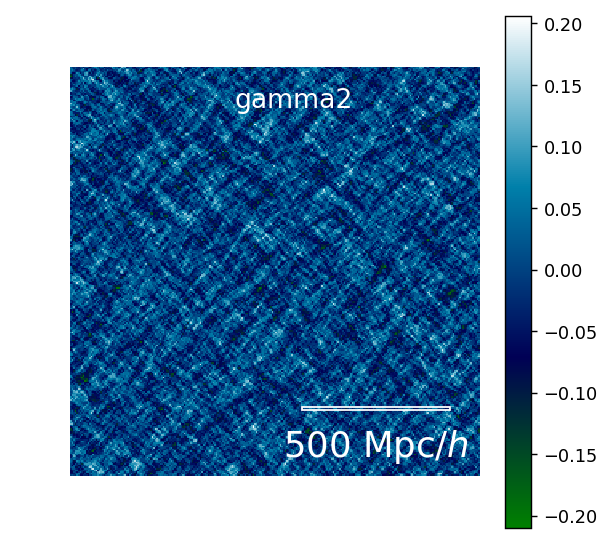

In [19]:
plot_image(m256.gamma1,text="gamma1")
plot_image(m256.gamma2,text="gamma2")

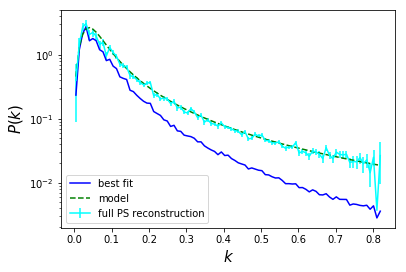

In [40]:
a = m256
bias = 1.0
plt.errorbar(a.k_bins, a.theta_est, yerr = a.theta_error, label = 'full PS reconstruction', color = 'cyan')
plt.plot(a.k_bins, a.delta_min_ps*bias, 'b', label = 'best fit')
#plt.plot(a.k_bins, a.delta_ps, 'r', label = 'initial')
plt.plot(a.k_bins, a.actual_ps, 'g--', label = 'model')
#plt.plot(a.k_bins, a.fiducial_ps, 'b--', label = 'fiducial')
plt.legend(loc = 3)
plt.semilogy()
plt.xlabel('$k$', fontsize = 15)
plt.ylabel('$P(k)$', fontsize = 15)
plt.savefig('power_spectrum_reconstructed.png')